In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

import scipy.signal as signal
import matplotlib.pyplot as plt
import pandas as pd
import heartpy as hp
import matplotlib.pyplot as plt


#FOR PPG
#import hrvanalysis
#from hrvanalysis import get_frequency_domain_features,get_time_domain_features

#for EDA
#import neurokit2 as nk




: 

In [ ]:
import os 
import pandas as pd
#Retrieving the metrics for a subject, plotting all of them to check raw data
#path='/Users/laura/Documents/EMOTIBIT/EMOTIBIT_DATA/Domenico'
#path='/Users/laura/Documents/EMOTIBIT/EMOTIBIT_DATA/Bogdan'
#path='/Users/laura/Documents/EMOTIBIT/EMOTIBIT_DATA/Thomas-2-Nostreaming'
path='/Users/laura/Documents/EMOTIBIT/EMOTIBIT_DATA/DOMENICO-PARCOURS'
#path='/Users/laura/Documents/EMOTIBIT/EMOTIBIT_DATA/Thomas-1/'
metrics = ["EA","EL","SA", "SR", "SF", "PI", "PR", "PG", "HR", "TH", "AX", "AY", "AZ", "GX", "GY", "GZ",
           "MX", "MY", "MZ", "T1", "DC", "DO", "UN"]

files = [file for file in os.listdir(path) if file.endswith(tuple(f'_{s}.csv' for s in metrics))]


data_dict = {}


for file in files:
    metric = file.split('_')[-1].replace('.csv', '')  
    
    df = pd.read_csv(os.path.join(path, file))  
    
    if 'LocalTimestamp' in df.columns:
        df['LocalTimestamp'] = pd.to_numeric(df['LocalTimestamp'], errors='coerce')
    else:
    
        continue  
    
    if metric not in df.columns:
        
        continue  

   
    data_dict[metric] = df


print(f" {list(data_dict.keys())}")





: 

 ['AX', 'AY', 'MZ', 'MX', 'AZ', 'MY', 'TH', 'PR', 'GZ', 'GX', 'PG', 'GY', 'HR', 'EA', 'SA', 'EL', 'SF', 'SR', 'PI', 'T1']


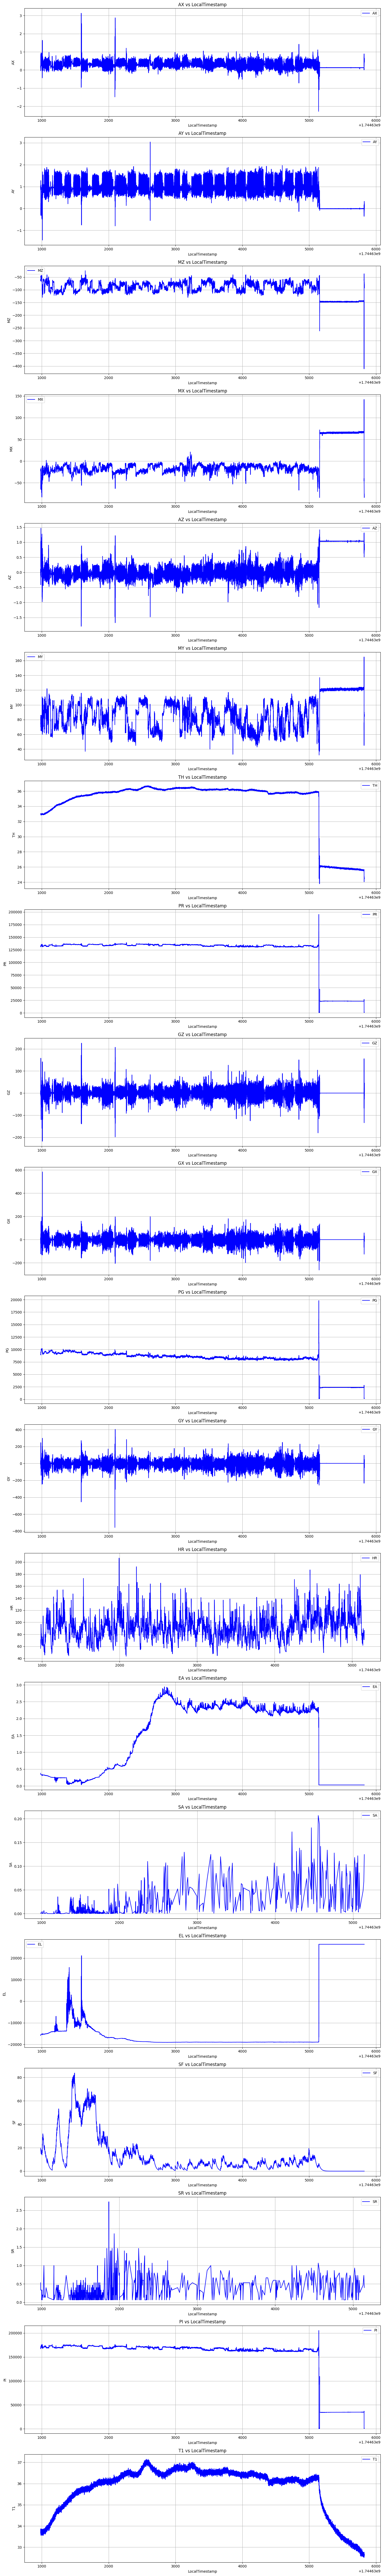

In [ ]:
metrics = ["EA","EL","SA", "SR", "SF", "PI", "PR", "PG", "HR", "TH", "AX", "AY", "AZ", "GX", "GY", "GZ",
           "MX", "MY", "MZ", "T1", "DC", "DO", "UN"]

files = [file for file in os.listdir(path) if file.endswith(tuple(f'_{s}.csv' for s in metrics))]


data_dict = {}


for file in files:
    metric = file.split('_')[-1].replace('.csv', '')  
    
    df = pd.read_csv(os.path.join(path, file))  
    
    if 'LocalTimestamp' in df.columns:
        df['LocalTimestamp'] = pd.to_numeric(df['LocalTimestamp'], errors='coerce')
    else:
    
        continue  
    
    if metric not in df.columns:
        
        continue  

   
    data_dict[metric] = df


print(f" {list(data_dict.keys())}")


plt.figure(figsize=(15, 5 * len(data_dict)))  

for i, (metric, df) in enumerate(data_dict.items()):
    plt.subplot(len(data_dict), 1, i + 1)
    plt.plot(df['LocalTimestamp'], df[metric], label=metric, color='blue')
    plt.title(f'{metric} vs LocalTimestamp')
    plt.xlabel('LocalTimestamp')
    plt.ylabel(metric)
    plt.grid(True)
    plt.legend()


plt.tight_layout()

plt.show()


In [ ]:
df = data_dict.get("PG") 
len(df)

#PG
df = data_dict.get("PG") 
print(df.head())  
df_filt = df.iloc[:-1000]  # Elimina las últimas N filas
df=df_filt


   LocalTimestamp  EmotiBitTimestamp  PacketNumber  DataLength TypeTag  \
0    1.744631e+09         726538.000         49908           3      PG   
1    1.744631e+09         726538.000         49908           3      PG   
2    1.744631e+09         726538.000         49908           3      PG   
3    1.744631e+09         726577.667         49923           3      PG   
4    1.744631e+09         726617.333         49923           3      PG   

   ProtocolVersion  DataReliability    PG  
0                1              100  9066  
1                1              100  9052  
2                1              100  9044  
3                1              100  9048  
4                1              100  9036  


In [ ]:
#duration
import pandas as pd

df["Datetime"] = pd.to_datetime(df["LocalTimestamp"], unit="s")

# Duración total
duration = df["Datetime"].iloc[-1] - df["Datetime"].iloc[0]
print(f"Duration: {duration}")

Duration: 0 days 01:20:04.124402046


/var/folders/1m/2gsg5r5x3_xb8rgnzdgz8_t00000gn/T/ipykernel_57404/2125189110.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Datetime"] = pd.to_datetime(df["LocalTimestamp"], unit="s")


In [ ]:
#PG
df = data_dict.get("PG") 
print(df.head())  
df_filt = df.iloc[:-3000].reset_index(drop=True)
df=df_filt


   LocalTimestamp  EmotiBitTimestamp  PacketNumber  DataLength TypeTag  \
0    1.744631e+09         726538.000         49908           3      PG   
1    1.744631e+09         726538.000         49908           3      PG   
2    1.744631e+09         726538.000         49908           3      PG   
3    1.744631e+09         726577.667         49923           3      PG   
4    1.744631e+09         726617.333         49923           3      PG   

   ProtocolVersion  DataReliability    PG  
0                1              100  9066  
1                1              100  9052  
2                1              100  9044  
3                1              100  9048  
4                1              100  9036  


In [ ]:
#checking time values
df.loc[:, 'LocalTimestamp'] = pd.to_datetime(df['LocalTimestamp'], unit='s')

print(df[['LocalTimestamp']].head())
df[['LocalTimestamp']]

df['TimeRelative'] = df['LocalTimestamp'] - df['LocalTimestamp'].iloc[0]

df['TimeRelative_seconds'] = df['TimeRelative'].dt.total_seconds()

df['TimeRelative_seconds']


                 LocalTimestamp
0 2025-04-14 11:43:01.459068060
1 2025-04-14 11:43:01.459068060
2 2025-04-14 11:43:01.459068060
3 2025-04-14 11:43:01.498733044
4 2025-04-14 11:43:01.538398981


/var/folders/1m/2gsg5r5x3_xb8rgnzdgz8_t00000gn/T/ipykernel_57404/3394805266.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['2025-04-14 11:43:01.459068060', '2025-04-14 11:43:01.459068060',
 '2025-04-14 11:43:01.459068060', '2025-04-14 11:43:01.498733044',
 '2025-04-14 11:43:01.538398981', '2025-04-14 11:43:01.578063965',
 '2025-04-14 11:43:01.618062973', '2025-04-14 11:43:01.658061028',
 '2025-04-14 11:43:01.698393106', '2025-04-14 11:43:01.738724947',
 ...
 '2025-04-14 13:01:44.634191990', '2025-04-14 13:01:44.674190998',
 '2025-04-14 13:01:44.714190006', '2025-04-14 13:01:44.754188061',
 '2025-04-14 13:01:44.794187069', '2025-04-14 13:01:44.834186077',
 '2025-04-14 13:01:44.874183893', '2025-04-14 13:01:44.914182901',
 '2025-04-14 13:01:44.954181910', '2025-04-14 13:01:44.994179964']
Length: 117182, dtype: datetime64[ns]' has dtype incompatible with float64, please explicitly cast to a compa

0            0.000000
1            0.000000
2            0.000000
3            0.039665
4            0.079331
             ...     
117177    4723.375118
117178    4723.415116
117179    4723.455115
117180    4723.495114
117181    4723.535112
Name: TimeRelative_seconds, Length: 117182, dtype: float64

In [ ]:
df = df[(df["TimeRelative_seconds"] >= 200)]

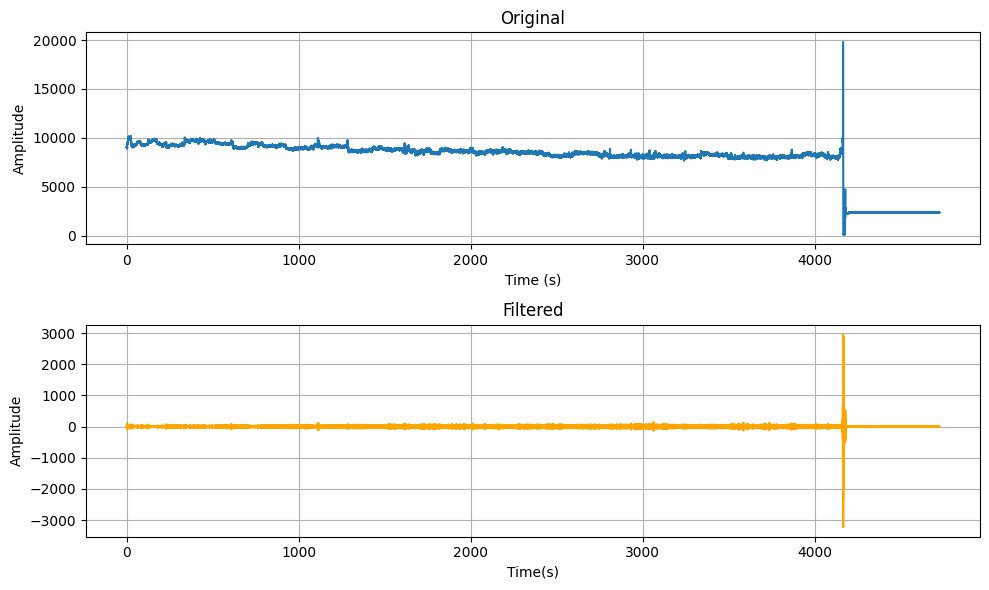

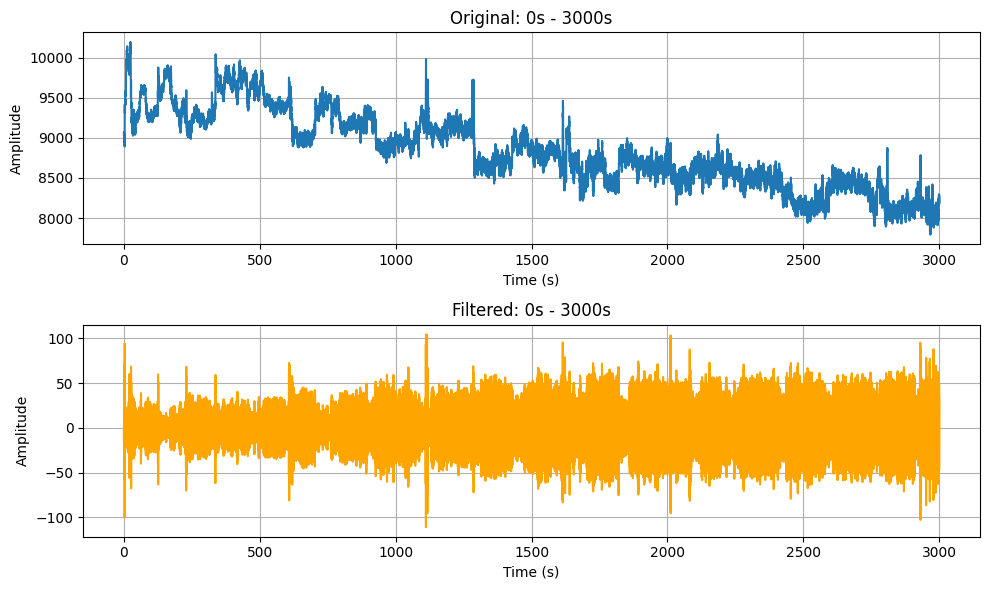

In [ ]:

#FILTERED
ppg_signal =df['PG'] 
time_relative =df['TimeRelative_seconds']


# Chebyshev II filter 4th order
order = 4
lowcut = 1  #low cut off
highcut = 2.0  # upper cut off
fs = 25 # sampling rate

#b, a = signal.cheby2(order, 40, [lowcut, highcut], fs=fs, btype='bandpass', analog=False)
b, a = signal.butter(order, [lowcut, highcut], fs=fs, btype='bandpass')

ppg_filtered = signal.filtfilt(b, a, ppg_signal)



plt.figure(figsize=(10, 6))


plt.subplot(2, 1, 1)
plt.plot(time_relative, ppg_signal, label="Original")
plt.title('Original')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)


plt.subplot(2, 1, 2)
plt.plot(time_relative, ppg_filtered, label="Filtered", color='orange')
plt.title('Filtered')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

#window size
t1 = 0  
t2 = 3000 


window = (time_relative >= t1) & (time_relative <= t2)
time_window = time_relative[window]
ppg_filtered_window = ppg_filtered[window]
ppg_signal_window = ppg_signal[window]
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(time_window, ppg_signal_window, label="Original")
plt.title(f'Original: {t1}s - {t2}s')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)


plt.subplot(2, 1, 2)
plt.plot(time_window, ppg_filtered_window, label="Filtered", color='orange')
plt.title(f'Filtered: {t1}s - {t2}s')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
wd, m = hp.process(ppg_filtered, sample_rate = 24, calc_freq=True)


bpm: 87.509919
ibi: 685.636560
sdnn: 49.817649
sdsd: 32.274494
rmssd: 44.176532
pnn20: 0.583154
pnn50: 0.107220
hr_mad: 41.666667
sd1: 31.235858
sd2: 62.124131
s: 6096.262144
sd1/sd2: 0.502798
breathingrate: 0.201791
vlf: 390.691904
lf: 550.726901
hf: 469.348882
lf/hf: 1.173385
p_total: 1410.767687
vlf_perc: 27.693568
lf_perc: 39.037391
hf_perc: 33.269041
lf_nu: 53.988822
hf_nu: 46.011178


/opt/anaconda3/envs/EMOTION/lib/python3.12/site-packages/heartpy/visualizeutils.py:119: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Figure size 3000x1500 with 0 Axes>

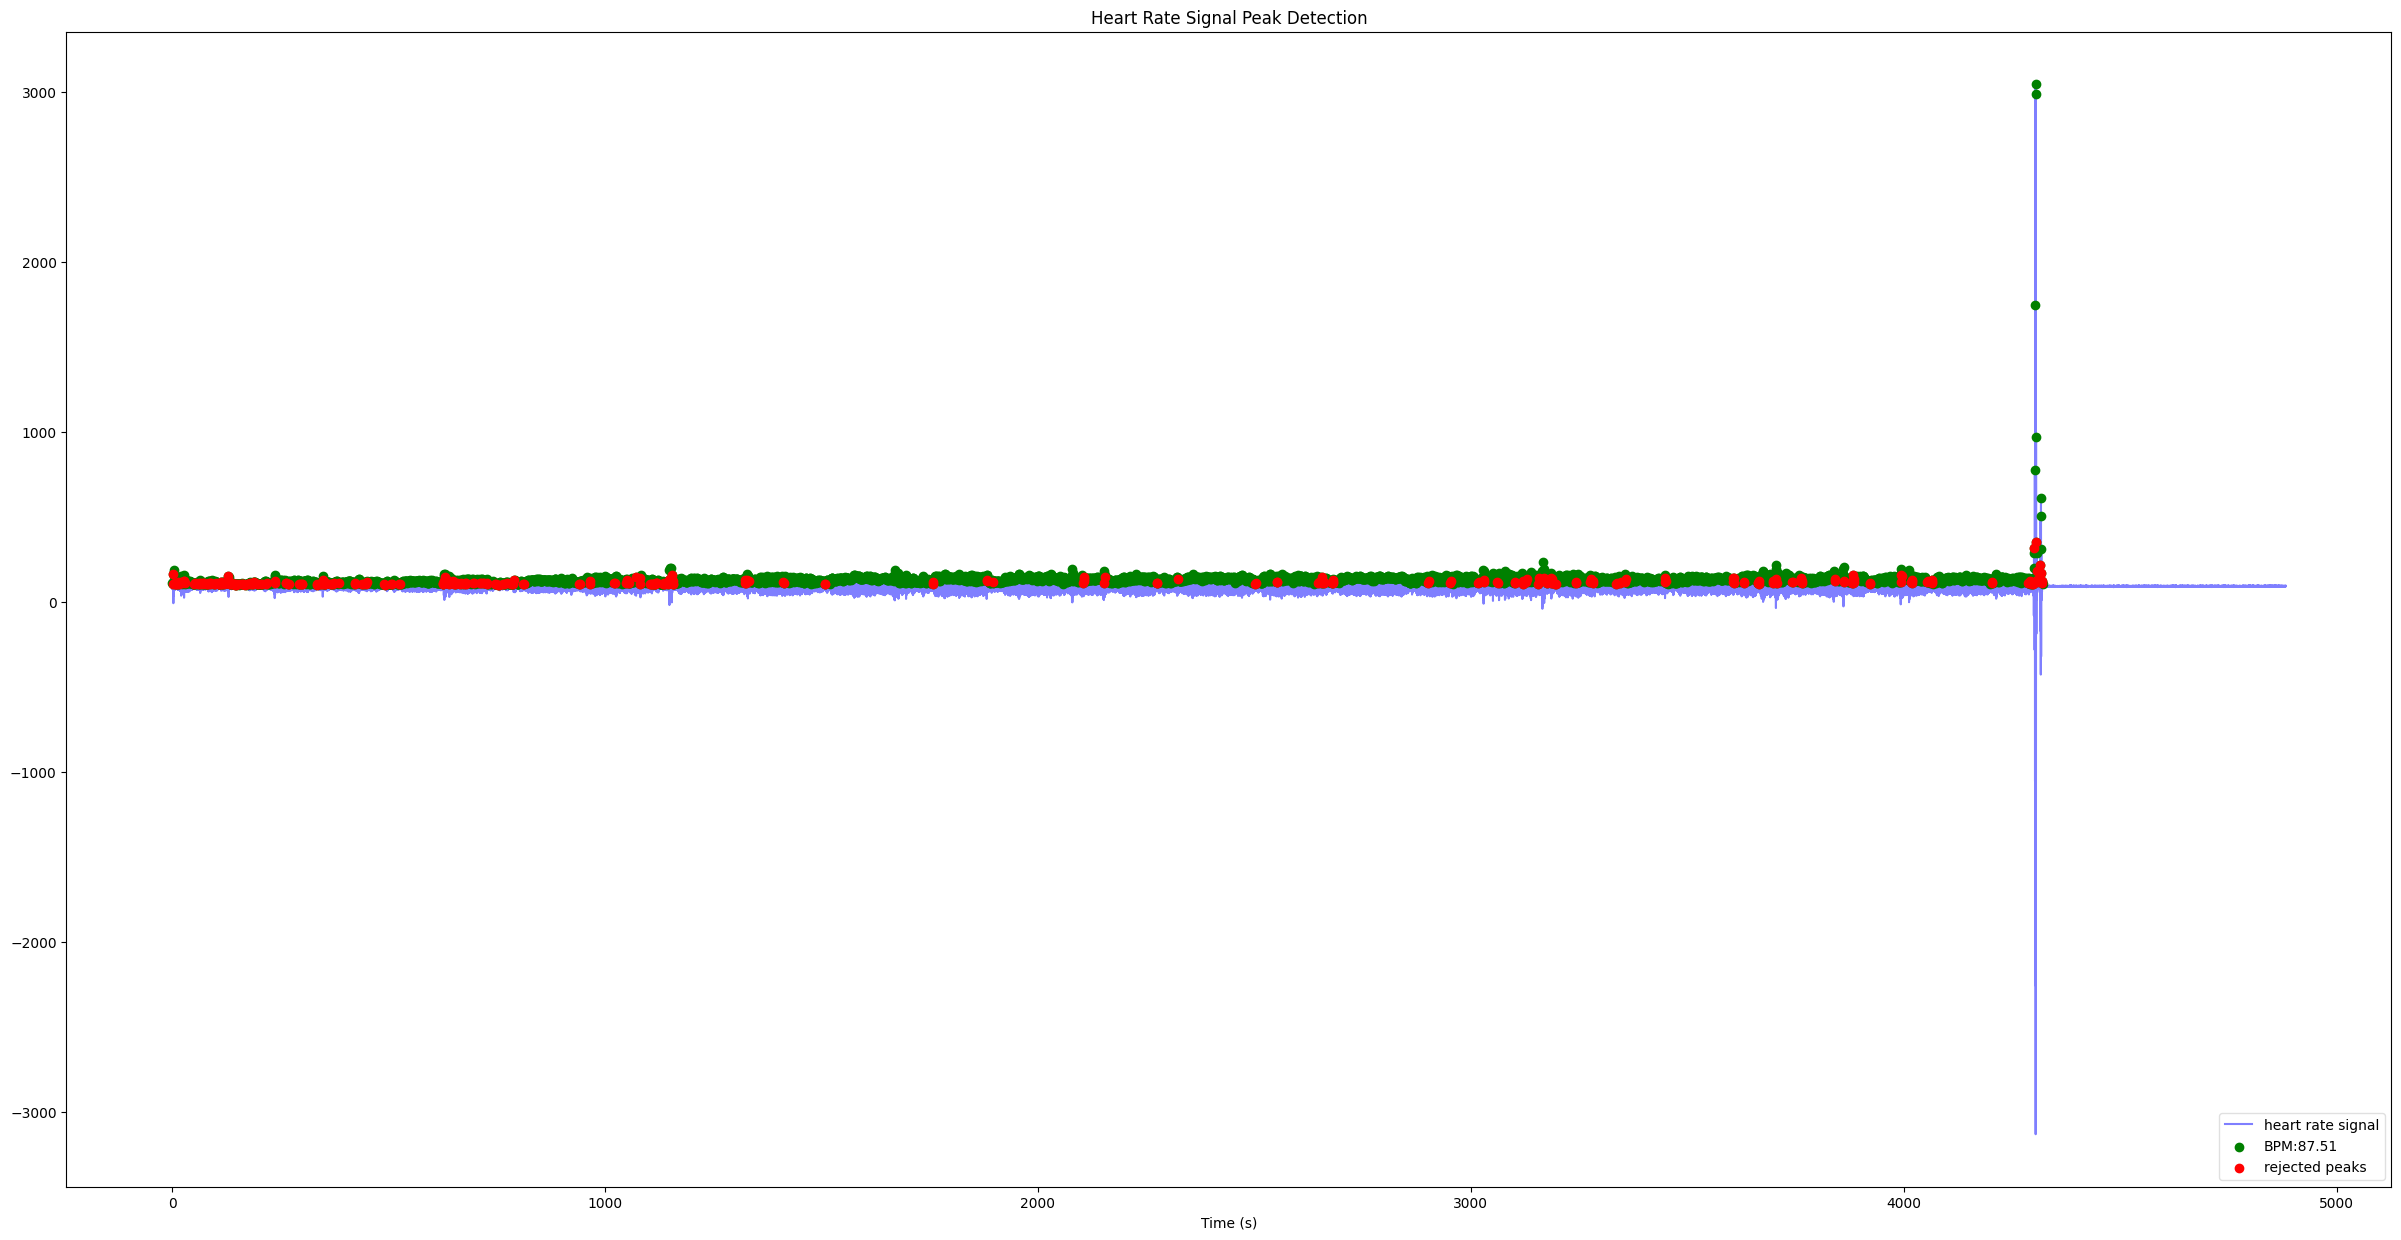

In [ ]:
#set large figure
plt.figure(figsize=(30,15))

#call plotter
hp.plotter(wd, m)
plt.gcf().set_size_inches(30, 15)
#display measures computed
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

plt.show()

count    1240.000000
mean       86.501444
std        19.269477
min        37.140000
25%        74.492500
50%        84.515000
75%        97.382500
max       225.600000
Name: HR, dtype: float64


/var/folders/1m/2gsg5r5x3_xb8rgnzdgz8_t00000gn/T/ipykernel_9113/4155943234.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LocalTimestamp'] = pd.to_datetime(df['LocalTimestamp'], unit='s')
/var/folders/1m/2gsg5r5x3_xb8rgnzdgz8_t00000gn/T/ipykernel_9113/4155943234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_in_seconds'] = df.index


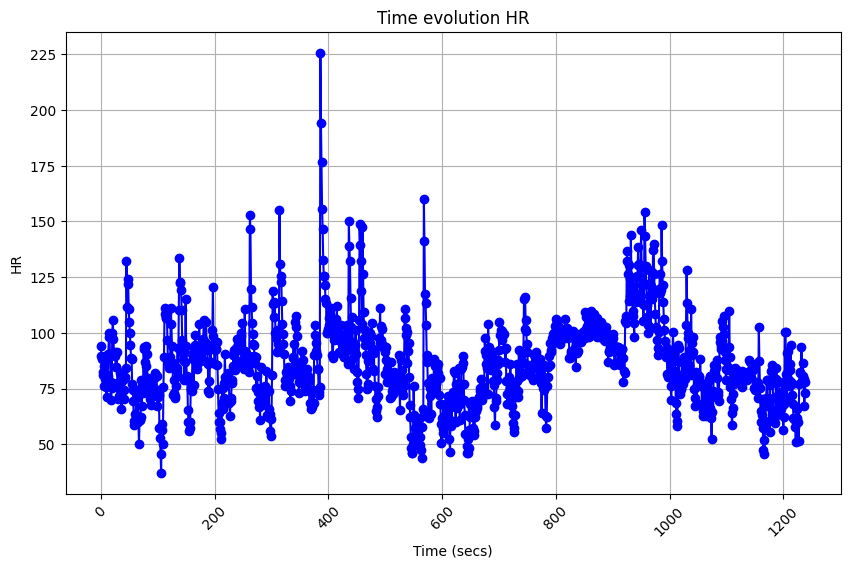

In [ ]:
df = data_dict.get("HR") 
df_filt = df.iloc[:-400]  # Elimina las últimas N filas
df=df_filt

df['LocalTimestamp'] = pd.to_datetime(df['LocalTimestamp'], unit='s')

print(df['HR'].describe())


df['time_in_seconds'] = df.index

# Graficar la evolución de HR en el tiempo (usando el índice como tiempo en segundos)
plt.figure(figsize=(10,6))
plt.plot(df['time_in_seconds'], df['HR'], marker='o', linestyle='-', color='b')
plt.title("Time evolution HR")
plt.xlabel("Time (secs)")
plt.ylabel("HR")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
